<h1><center><font size="6">Holdout Set Notebook</font></center></h1>

# Contents

- <a href='#1'>Importing Packages</a> 
- <a href='#2'>Importing Holdout Set Dataframe</a>
- <a href='#3'>VGG16 Based CNN Model</a>
    - <a href='#31'>Generating the Datasets</a>   
    - <a href='#32'>Whole Model After Training</a>   
    - <a href='#33'>Predicting on Entire Testing Dataset</a>   
- <a href='#4'>Final CNN Model</a>
    - <a href='#41'>Generating the Datasets</a>   
    - <a href='#42'>Whole Model After Training</a>   
    - <a href='#43'>Model with Lowest Validation Loss</a>   
    - <a href='#44'>Predicting on Entire Testing Dataset</a>  
- <a href='#5'>Alexnet Model</a>
    - <a href='#51'>Generating the Datasets</a>   
    - <a href='#52'>Whole Model After Training</a>   
    - <a href='#53'>Predicting on Entire Testing Dataset</a>  
- <a href='#6'>MobileNet Model</a>
    - <a href='#61'>Generating the Datasets</a>   
    - <a href='#62'>Whole Model After Training</a>   
    - <a href='#63'>Model with Lowest Validation Loss</a>   
    - <a href='#64'>Predicting on Entire Testing Dataset</a>  
- <a href='#7'>VGG19 Model</a>
    - <a href='#71'>Generating the Datasets</a>   
    - <a href='#72'>Whole Model After Training</a>   
    - <a href='#73'>Model with Lowest Validation Loss</a>   
    - <a href='#74'>Predicting on Entire Testing Dataset</a>  


# Importing Packages

In [4]:
# importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime

import warnings
warnings.simplefilter("ignore")

import tensorflow as tf
import keras
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization, Conv2D, MaxPool2D, GlobalAveragePooling2D, Input
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, CSVLogger, ReduceLROnPlateau
from keras.applications.vgg16 import VGG16

from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve

from utils import *

%reload_ext autoreload
%autoreload 2

# Importing Additional Holdout Set

In [2]:
# import dataframe with filenmae and tarft
df = pd.read_csv("../data/test_2017.csv", index_col=0)
df.head()

,file,age,gender,target
0,ISIC_0000000,55.0,female,0
1,ISIC_0000001,30.0,female,0
2,ISIC_0000002,60.0,female,1
3,ISIC_0000003,30.0,male,0
4,ISIC_0000004,80.0,male,1


# VGG16-Based CNN Model

In [5]:
# generate datasests for testing and validaition

test_folder = '../split/test'
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_folder, 
        target_size = (256, 256),
        seed = 42,
        batch_size = 1,
        class_mode = 'binary',
        shuffle = False)
STEP_SIZE_TEST = test_generator.n // test_generator.batch_size

test_folder_2 = '../split/test2'
test_generator_2 = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_folder_2,
        target_size = (256, 256),
        batch_size = 1,
        class_mode = 'binary',
        shuffle = False,
        seed = 42)
STEP_SIZE_TEST_2 = test_generator_2.n // test_generator_2.batch_size

Found 3766 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


## Loading Best Model

In [6]:
# load entire model after training proccess
model_cnn_1 = load_model('../logs/log_cnn1a/model.16-0.15.hdf5')

## Evaluating on Entire Testing Dataset

3766/3766 [==============================] - 1871s 496ms/step


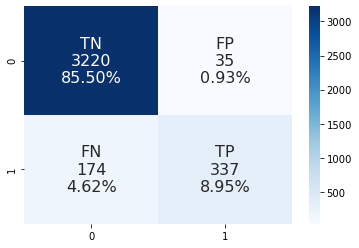

In [7]:
# display confusion matrix visualization
pred = model_cnn_1.predict_generator(test_generator, steps = STEP_SIZE_TEST, verbose = 1)
y_true = test_generator.classes
y_pred = pred > 0.5
make_confusion_matrix(y_true, y_pred)

In [26]:
# get testing accuracy and loss
test_generator_2.reset()
score_1a = model_cnn1.evaluate_generator(test_generator_2, verbose = 1)

print("Loss: " + str(score_1a[0]))
print("Accuracy: " + str(score_1a[1]))
print("Precision: " + str(score_1a[2]))
print("Recall: " + str(score_1a[3]))
print("ROC-AUC: " + str(score_1a[4]))
print("PR-AUC: " + str(score_1a[5]))

3766/3766 [==============================] - 3174s 838ms/step - loss: 0.1734 - accuracy: 0.9371 - auc: 0.9498 - auc_1: 0.9889 - precision: 0.9454 - recall: 0.9840
Loss: 0.1734401434659958
Accuracy: 0.937068521976471
Precision: 0.949761152267456
Recall: 0.9889240860939026
ROC-AUC: 0.9453955292701721
PR-AUC: 0.9840245842933655


## Evaluating on Additional Holdout Set

2000/2000 [==============================] - 1130s 565ms/step


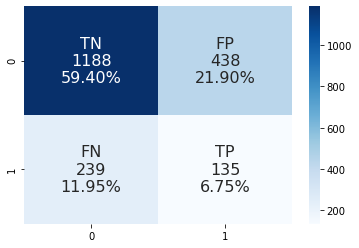

In [10]:
# display confusion matrix visualization
pred_1a = model_cnn_1.predict_generator(test_generator_2, steps = STEP_SIZE_TEST_2, verbose = 1)
y_true_2 = test_generator_2.classes
y_pred_1a = pred_1a > 0.5
make_confusion_matrix(y_true_2, y_pred_1a)

In [32]:
# get testing accuracy and loss
test_generator.reset()
score = model_cnn_1.evaluate_generator(test_generator, verbose = 1)

print("Loss: " + str(score[0]))
print("Accuracy: " + str(score[1]))
print("Precision: " + str(score[2]))
print("Recall: " + str(score[3]))
print("ROC-AUC: " + str(score[4]))
print("PR-AUC: " + str(score[5]))

2000/2000 [==============================] - 508s 254ms/step - loss: 0.8448 - accuracy: 0.6710 - auc: 0.5852 - auc_1: 0.8437 - precision: 0.8462 - recall: 0.7276
Loss: 0.8447545766830444
Accuracy: 0.6710000038146973
Precision: 0.5852424502372742
Recall: 0.8436755537986755
ROC-AUC: 0.8462088704109192
PR-AUC: 0.7275522947311401


# Final CNN Model

In [11]:
test_fldr = '../split/test'
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_fldr, 
        target_size = (256, 256),
        seed = 42,
        batch_size = 1,
        class_mode = 'binary',
        shuffle = False)
STEP_SIZE_TEST = test_generator.n // test_generator.batch_size

test_fldr_2 = '../split/test2'
test_generator_2 = ImageDataGenerator(rescale=1/255).flow_from_directory(
        test_fldr_2,
        target_size = (256, 256),
        batch_size = 1,
        class_mode = 'binary',
        shuffle = False,
        seed = 42)
STEP_SIZE_TEST_2 = test_generator_2.n // test_generator_2.batch_size

Found 3766 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


## Loading Best Model

In [12]:
model_cnn_2 = load_model('../logs/log_cnn2/model.06-0.17.hdf5')

## Predicting on Entire Testing Dataset

3766/3766 [==============================] - 1681s 446ms/step


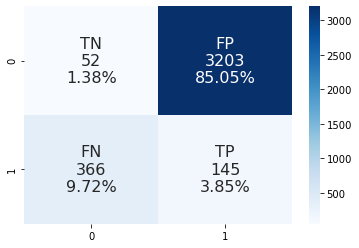

In [13]:
# display confusion matrix visualization
test_generator.reset()
pred_2 = model_cnn_2.predict_generator(test_generator, steps = STEP_SIZE_TEST, verbose = 1)
y_true = test_generator.classes
y_pred_2 = pred_2 > 0.5
make_confusion_matrix(y_true, y_pred_2)

In [28]:
# get testing accuracy and loss
test_generator.reset()
score_2a = model_cnn_2.evaluate_generator(test_generator, verbose = 1)

print("Loss: " + str(score_2a[0]))
print("Accuracy: " + str(score_2a[1]))
print("Precision: " + str(score_2a[2]))
print("Recall: " + str(score_2a[3]))
print("ROC-AUC: " + str(score_2a[4]))
print("PR-AUC: " + str(score_2a[5]))

3766/3766 [==============================] - 3235s 857ms/step - loss: 0.2067 - accuracy: 0.9320 - auc: 0.9305 - auc_1: 0.9844 - precision: 0.9610 - recall: 0.9604
Loss: 0.20669563114643097
Accuracy: 0.9320233464241028
Precision: 0.9304919242858887
Recall: 0.9843703508377075
ROC-AUC: 0.9609591364860535
PR-AUC: 0.9603686928749084


## Predicting on Additional Holdout Dataset

2000/2000 [==============================] - 705s 352ms/step


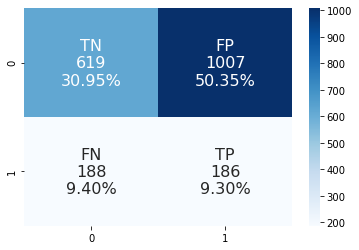

In [14]:
# display confusion matrix visualization
test_generator_2.reset()
pred_2a = model_cnn_2.predict_generator(test_generator_2, steps = STEP_SIZE_TEST_2, verbose = 1)
y_true_2 = test_generator_2.classes
y_pred_2a = pred_2a > 0.5
make_confusion_matrix(y_true_2, y_pred_2a)

In [6]:
# get testing accuracy and loss
test_generator_2.reset()
score_2 = model_cnn_2.evaluate_generator(test_generator_2, verbose = 1)

print("Loss: " + str(score_2[0]))
print("Accuracy: " + str(score_2[1]))
print("Precision: " + str(score_2[2]))
print("Recall: " + str(score_2[3]))
print("ROC-AUC: " + str(score_2[4]))
print("PR-AUC: " + str(score_2[5]))

2000/2000 [==============================] - 449s 224ms/step - loss: 0.8798 - accuracy: 0.5975 - auc: 0.5809 - auc_1: 0.8469 - precision: 0.8441 - recall: 0.6193
Loss: 0.8797648549079895
Accuracy: 0.5975000262260437
Precision: 0.5808535814285278
Recall: 0.8468694090843201
ROC-AUC: 0.8440905213356018
PR-AUC: 0.6193112134933472


# AlexNet

In [8]:
test_fldr = '../split/test'
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_fldr, 
        target_size = (227, 227),
        seed = 42,
        batch_size = 1,
        class_mode = 'binary',
        shuffle = False)
STEP_SIZE_TEST = test_generator.n // test_generator.batch_size

test_fldr_2 = '../split/test2'
test_generator_2 = ImageDataGenerator(rescale=1/255).flow_from_directory(
        test_fldr_2,
        target_size = (227, 227),
        batch_size = 1,
        class_mode = 'binary',
        shuffle = False,
        seed = 42)
STEP_SIZE_TEST_2 = test_generator_2.n // test_generator_2.batch_size

Found 2000 images belonging to 2 classes.
Found 3766 images belonging to 2 classes.


## Predicting on Entire Testing Dataset

In [9]:
# load entire model after training proccess
model_alex = load_model('../models/alexnet')

2000/2000 [==============================] - 379s 189ms/step


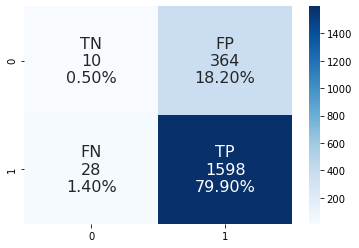

In [27]:
# display confusion matrix visualization
pred_3 = model_alex.predict_generator(test_generator, steps = STEP_SIZE_TEST, verbose = 1)
y_true = test_generator.classes
y_pred_3 = pred3 > 0.5
make_confusion_matrix(y_true, y_pred_3)

In [9]:
# get testing accuracy and loss
test_generator.reset()
score_3 = model_alex.evaluate_generator(test_generator, verbose = 1)

print("Loss: " + str(score_3[0]))
print("Accuracy: " + str(score_3[1]))
print("Precision: " + str(score_3[2]))
print("Recall: " + str(score_3[3]))
print("ROC-AUC: " + str(score_3[4]))
print("PR-AUC: " + str(score_3[5]))

2000/2000 [==============================] - 444s 222ms/step - loss: 1.5783 - accuracy: 0.8040 - precision_1: 0.8145 - recall_1: 0.9828 - auc_2: 0.5363 - auc_3: 0.8223
Loss: 1.578322410583496
Accuracy: 0.8040000200271606
Precision: 0.8144749999046326
Recall: 0.9827798008918762
ROC-AUC: 0.5363264083862305
PR-AUC: 0.8223297595977783


## Predicting on Additional Holdout Set

3766/3766 [==============================] - 2595s 689ms/step


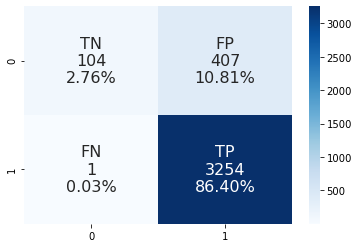

In [14]:
# display confusion matrix visualization
test_generator_2.reset()
pred_3a = model_alex.predict_generator(test_generator_2, steps = STEP_SIZE_TEST_2, verbose = 1)
y_true_2 = test_generator_2.classes
y_pred_3a = pred_3a > 0.5
make_confusion_matrix(y_true_2, y_pred_3a)

In [10]:
# get testing accuracy and loss
test_generator_2.reset()
score_3a = model_alex.evaluate_generator(test_generator_2, verbose = 1)

print("Loss: " + str(score_3a[0]))
print("Accuracy: " + str(score_3a[1]))
print("Precision: " + str(score_3a[2]))
print("Recall: " + str(score_3a[3]))
print("ROC-AUC: " + str(score_3a[4]))
print("PR-AUC: " + str(score_3a[5]))

3766/3766 [==============================] - 2046s 543ms/step - loss: 0.6865 - accuracy: 0.8917 - precision_1: 0.8888 - recall_1: 0.9997 - auc_2: 0.8945 - auc_3: 0.9715
Loss: 0.6865277886390686
Accuracy: 0.8916622400283813
Precision: 0.8888282179832458
Recall: 0.9996927976608276
ROC-AUC: 0.894485354423523
PR-AUC: 0.9714863300323486


# ResNet50

In [ ]:
test_fldr = '../split/test'
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_fldr, 
        target_size = (224, 224),
        seed = 42,
        batch_size = 1,
        class_mode = 'binary',
        shuffle = False)
STEP_SIZE_TEST = test_generator.n // test_generator.batch_size

test_fldr_2 = '../split/test2'
test_generator_2 = ImageDataGenerator(rescale=1/255).flow_from_directory(
        test_fldr_2,
        target_size = (224, 224),
        batch_size = 1,
        class_mode = 'binary',
        shuffle = False,
        seed = 42)
STEP_SIZE_TEST_2 = test_generator_2.n // test_generator_2.batch_size

## Predicting on entire testing dataset

In [ ]:
# load entire model after training proccess
model_res = load_model('../logs/log_resnet_2/.....')

In [ ]:
# display confusion matrix visualization
pred_4 = model_res.predict_generator(test_generator, steps = STEP_SIZE_TEST, verbose = 1)
y_true = test_generator.classes
y_pred_4 = pred_4 > 0.5
make_confusion_matrix(y_true, y_pred_4)

In [ ]:
# get testing accuracy and loss
test_generator.reset()
score_4 = model_alex.evaluate_generator(test_generator, verbose = 1)

print("Loss: " + str(score_4[0]))
print("Accuracy: " + str(score_4[1]))
print("Precision: " + str(score_4[2]))
print("Recall: " + str(score_4[3]))
print("ROC-AUC: " + str(score_4[4]))
print("PR-AUC: " + str(score_4[5]))

## Predicting on additional holdout set

In [ ]:
# display confusion matrix visualization
test_generator_2.reset()
pred_4a = model_alex.predict_generator(test_generator_2, steps = STEP_SIZE_TEST_2, verbose = 1)
y_true_2 = test_generator_2.classes
y_pred_4a = pred_4a > 0.5
make_confusion_matrix(y_true_2, y_pred_4a)

In [ ]:
# get testing accuracy and loss
test_generator_2.reset()
score_4a = model_alex.evaluate_generator(test_generator_2, verbose = 1)

print("Loss: " + str(score_4a[0]))
print("Accuracy: " + str(score_4a[1]))
print("Precision: " + str(score_4a[2]))
print("Recall: " + str(score_4a[3]))
print("ROC-AUC: " + str(score_4a[4]))
print("PR-AUC: " + str(score_4a[5]))

# MobileNet

In [11]:
test_fldr = '../split/test'
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_fldr, 
        target_size = (256, 256),
        seed = 42,
        batch_size = 1,
        class_mode = 'binary',
        shuffle = False)
STEP_SIZE_TEST = test_generator.n // test_generator.batch_size

test_fldr_2 = '../split/test2'
test_generator_2 = ImageDataGenerator(rescale=1/255).flow_from_directory(
        test_fldr_2,
        target_size = (256, 256),
        batch_size = 1,
        class_mode = 'binary',
        shuffle = False,
        seed = 42)
STEP_SIZE_TEST_2 = test_generator_2.n // test_generator_2.batch_size

Found 2000 images belonging to 2 classes.
Found 3766 images belonging to 2 classes.


## Predicting on entire testing dataset

In [12]:
# load entire model after training proccess
model_mob_2 = load_model("../logs/log_mobilenet/model.04-0.14.hdf5")

2000/2000 [==============================] - 429s 214ms/step


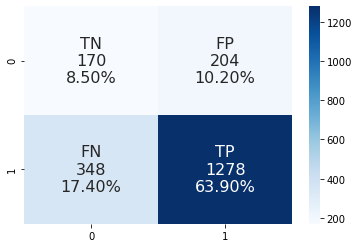

In [37]:
# display confusion matrix visualization
pred_5 = model_mob.predict_generator(test_generator, steps = STEP_SIZE_TEST, verbose = 1)
y_true = test_generator.classes
y_pred_5 = pred_5 > 0.5
make_confusion_matrix(y_true, y_pred_5)

In [55]:
# get metrics for holdout set
test_generator.reset()
score_5 = model_mob.evaluate_generator(test_generator, verbose = 1)

print("Loss: " + str(score_5[0]))
print("Accuracy: " + str(score_5[1]))
print("Precision: " + str(score_5[2]))
print("Recall: " + str(score_5[3]))
print("ROC-AUC: " + str(score_5[4]))
print("PR-AUC: " + str(score_5[5]))

2000/2000 [==============================] - 360s 180ms/step - loss: 1.3089 - accuracy: 0.7240 - precision: 0.8623 - recall: 0.7860 - auc: 0.6720 - auc_1: 0.8822
Loss: 1.3088557720184326
Accuracy: 0.7239999771118164
Precision: 0.862348198890686
Recall: 0.785977840423584
ROC-AUC: 0.6719650030136108
PR-AUC: 0.8822048306465149


## Model with Lowest Validation Loss

In [13]:
model_mob_2 = load_model("../logs/log_mobilenet/model.04-0.14.hdf5")

2000/2000 [==============================] - 372s 186ms/step


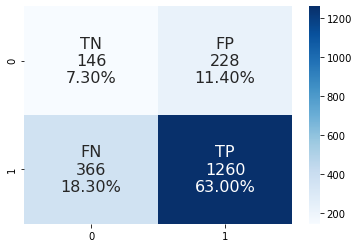

In [60]:
# display confusion matrix visualization
test_generator.reset()
pred_4a = model_mob_2.predict_generator(test_generator, steps = STEP_SIZE_TEST, verbose = 1)
y_true = test_generator.classes
y_pred_4a = pred_4a > 0.5
make_confusion_matrix(y_true, y_pred_4a)

In [12]:
# get testing accuracy and loss
test_generator.reset()
score_4a = model_mob_2.evaluate_generator(test_generator, verbose = 1)

print("Loss: " + str(score_4a[0]))
print("Accuracy: " + str(score_4a[1]))
print("Precision: " + str(score_4a[2]))
print("Recall: " + str(score_4a[3]))
print("ROC-AUC: " + str(score_4a[4]))
print("PR-AUC: " + str(score_4a[5]))

2000/2000 [==============================] - 733s 366ms/step - loss: 0.8050 - accuracy: 0.7030 - precision: 0.8468 - recall: 0.7749 - auc: 0.6339 - auc_1: 0.8733
Loss: 0.8050376176834106
Accuracy: 0.703000009059906
Precision: 0.8467742204666138
Recall: 0.7749077677726746
ROC-AUC: 0.6339101791381836
PR-AUC: 0.8732956051826477


In [ ]:
# display confusion matrix visualization
test_generator_2.reset()
pred_4a = model_mob_2.predict_generator(test_generator, steps = STEP_SIZE_TEST, verbose = 1)
y_true = test_generator.classes
y_pred_4a = pred_4a > 0.5
make_confusion_matrix(y_true, y_pred_4a)

In [ ]:
# get testing accuracy and loss
test_generator_2.reset()
score_4c = model_mob_2.evaluate_generator(test_generator_2, verbose = 1)

print("Loss: " + str(score_4c[0]))
print("Accuracy: " + str(score_4c[1]))
print("Precision: " + str(score_4c[2]))
print("Recall: " + str(score_4c[3]))
print("ROC-AUC: " + str(score_4c[4]))
print("PR-AUC: " + str(score_4c[5]))

# VGG19

In [9]:
test_fldr = '../split/test'
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_fldr, 
        target_size = (224, 224),
        seed = 42,
        batch_size = 1,
        class_mode = 'binary',
        shuffle = False)
STEP_SIZE_TEST = test_generator.n // test_generator.batch_size

test_fldr_2 = '../split/test2'
test_generator_2 = ImageDataGenerator(rescale=1/255).flow_from_directory(
        test_fldr_2,
        target_size = (224, 224),
        batch_size = 1,
        class_mode = 'binary',
        shuffle = False,
        seed = 42)
STEP_SIZE_TEST_2 = test_generator_2.n // test_generator_2.batch_size

Found 2000 images belonging to 2 classes.
Found 3766 images belonging to 2 classes.


## Predicting on Entire Testing Dataset

In [5]:
model_vgg19 = load_model("../logs/log_vgg19/model.07-0.14.hdf5")

2000/2000 [==============================] - 761s 381ms/step


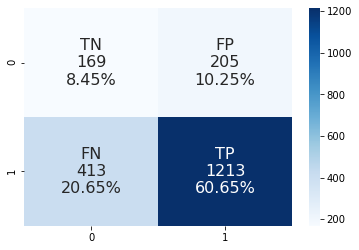

In [15]:
# display confusion matrix visualization
pred_5 = model_vgg19.predict_generator(test_generator, steps = STEP_SIZE_TEST, verbose = 1)
y_true = test_generator.classes
y_pred_5 = pred_5 > 0.5
make_confusion_matrix(y_true, y_pred_5)

In [16]:
# get testing accuracy and loss
test_generator.reset()
score_5 = model_vgg19.evaluate_generator(test_generator, verbose = 1)

print("Loss: " + str(score_5[0]))
print("Accuracy: " + str(score_5[1]))
print("Precision: " + str(score_5[2]))
print("Recall: " + str(score_5[3]))
print("ROC-AUC: " + str(score_5[4]))
print("PR-AUC: " + str(score_5[5]))

2000/2000 [==============================] - 700s 350ms/step - loss: 0.7440 - accuracy: 0.6910 - auc_6: 0.6678 - auc_7: 0.8899 - precision_3: 0.8554 - recall_3: 0.7460
Loss: 0.7440076470375061
Accuracy: 0.6909999847412109
Precision: 0.667758584022522
Recall: 0.8898553848266602
ROC-AUC: 0.8554301857948303
PR-AUC: 0.7460024356842041


## Predicting on Additional Holdout Set

3766/3766 [==============================] - 2671s 708ms/step


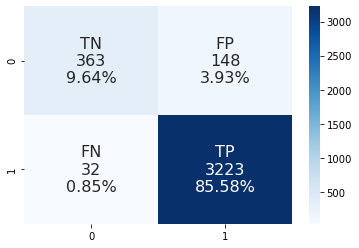

In [24]:
# display confusion matrix visualization
test_generator_2.reset()
pred_5a = model_vgg19.predict_generator(test_generator_2, steps = STEP_SIZE_TEST_2, verbose = 1)
y_true_2 = test_generator_2.classes
y_pred_5a = pred_5a > 0.5
make_confusion_matrix(y_true_2, y_pred_5a)

In [ ]:
# get testing accuracy and loss
test_generator_2.reset()
score_5a = model_vgg19.evaluate_generator(test_generator_2, verbose = 1)

print("Loss: " + str(score_5a[0]))
print("Accuracy: " + str(score_5a[1]))
print("Precision: " + str(score_5a[2]))
print("Recall: " + str(score_5a[3]))
print("ROC-AUC: " + str(score_5a[4]))
print("PR-AUC: " + str(score_5a[5]))

## Dataframe Comparing Metrics

# Predicting on Unlabeled Testing Set

In [ ]:
# for unlabeled testing set
test_generator = test_datagen.flow_from_directory(
    directory = pred_dir,
    class_mode = None,
    shuffle = False
)
# reset to avoid any unwanted outputs
test_generator.reset()
pred = model.predict_generator(test_generator, verbose=1, steps = STEP_TEST_SIZE)
pred_class = np.argmax(pred, axis=1)
l = dict((v,k) for k,v in train_generator.class_indices.items())
prednames = [l[k] for k in pred_classes]
filenames = test_generator.filenames
finaldf = pd.DataFrame({'Filename': filenames, "Prediction": prednames})